In [1]:
import glob
import h5py
import numpy as np
import tensorflow as tf
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, metrics
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout, Reshape, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers.merge import add
import matplotlib.pyplot as plt
import numpy as np
import os

File_Path = "Test_data_MP.h5"
weights_PATH = "FCN+MLP_Ef.ckpt"

ICSD = h5py.File(File_Path, 'r')
stack = ICSD['data'][:,:]

x_data_1 = stack[:,:-107]/100
x_data_2 = stack[:,-107:-7].reshape(-1,1,100)
y_data = (stack[:,-3]).reshape(-1,1)

In [2]:
drop_rate= 0.2
drop_rate_2= 0.2
initializer = tf.keras.initializers.GlorotUniform()

inputs = keras.Input(shape=(8192, 1))

c1=layers.Conv1D(filters=16, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(inputs)
p1=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c1)
p1=layers.Dropout(rate=drop_rate)(p1)
c2=layers.Conv1D(filters=16, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p1)
p2=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c2)
p2=layers.Dropout(rate=drop_rate)(p2)
c3=layers.Conv1D(filters=32, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p2)
p3=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c3)
p3=layers.Dropout(rate=drop_rate)(p3)
c4=layers.Conv1D(filters=32, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p3)
p4=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c4)
p4=layers.Dropout(rate=drop_rate)(p4)
c5=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p4)
p5=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c5)
p5=layers.Dropout(rate=drop_rate)(p5)
c6=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p5)
p6=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c6)
p6=layers.Dropout(rate=drop_rate)(p6)
c7=layers.Conv1D(filters=128, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p6)
p7=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c7)
p7=layers.Dropout(rate=drop_rate)(p7)
c8=layers.Conv1D(filters=128, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p7)
p8=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c8)
p8=layers.Dropout(rate=drop_rate)(p8)
c9=layers.Conv1D(filters=256, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p8)
p9=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c9)
p9=layers.Dropout(rate=drop_rate)(p9)
c10=layers.Conv1D(filters=256, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p9)
p10=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c10)
p10=layers.Dropout(rate=drop_rate)(p10)
c11=layers.Conv1D(filters=512, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p10)
p11=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c11)
p11=layers.Dropout(rate=drop_rate)(p11)
c12=layers.Conv1D(filters=512, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p11)
p12=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c12)
p12=layers.Dropout(rate=drop_rate_2)(p12)
c13=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', kernel_initializer=initializer)(p12)
p13=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c13)
p13=layers.Dropout(rate=drop_rate_2)(p13)
f1= layers.Flatten()(p13)


inputs_2 = keras.Input(shape=(1, 100))

d1_2 = layers.Dense(128, kernel_initializer=initializer, activation='relu')(inputs_2)
d1_2 = layers.Dropout(rate=drop_rate)(d1_2)
d2_2 = layers.Dense(256, kernel_initializer=initializer, activation='relu')(d1_2)
d2_2 = layers.Dropout(rate=drop_rate)(d2_2)
d3_2 = layers.Dense(256, kernel_initializer=initializer, activation='relu')(d2_2)
d3_2 = layers.Dropout(rate=drop_rate)(d3_2)
d4_2 = layers.Dense(128, kernel_initializer=initializer, activation='relu')(d3_2)
d4_2 = layers.Dropout(rate=drop_rate)(d4_2)
d5_2 = layers.Dense(64, kernel_initializer=initializer, activation='relu')(d4_2)
d5_2 = layers.Dropout(rate=drop_rate)(d5_2)
d6_2 = layers.Dense(8, kernel_initializer=initializer, activation='relu')(d5_2)
f2= layers.Flatten()(d6_2)


concatenated = concatenate([f1, f2])
dense_all_1 = layers.Dense(16, kernel_initializer=initializer, activation='relu')(concatenated)
dense_all_1 = layers.Dropout(rate=drop_rate)(dense_all_1)
outputs = layers.Dense(1, kernel_initializer=initializer)(dense_all_1)
model = tf.keras.Model(inputs=[inputs, inputs_2], outputs=[outputs])

model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt,  loss='mae', metrics = ['mae', 'mse'])
model.load_weights("FCN+MLP_Eg.ckpt")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8192, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 8192, 16)     64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 4096, 16)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096, 16)     0           max_pooling1d[0][0]              
______________________________________________________________________________________________

In [3]:
model.evaluate([x_data_1,x_data_2], y_data)

4/4 [==============================] - 1s 22ms/step - loss: 0.3112 - mae: 0.3112 - mse: 0.3290


[0.31120553612709045, 0.31120553612709045, 0.3290376663208008]

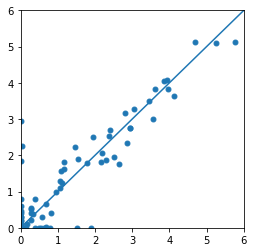

In [4]:
pred_y = model.predict([x_data_1,x_data_2])

plt.figure(figsize=(4, 4))
plt.scatter(y_data, pred_y, s=24)

plt.plot([0, 6], [0, 6])

plt.xlim(0, 6) 
plt.ylim(0, 6)
plt.show()